In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random 
import copy
%matplotlib inline

In [3]:
def diff(x,y):
    '''
        Compare 2 floats
    '''
    return abs((x-y)/y)

In [5]:
pop = np.random.rand(10000)
pop_mean, pop_var = pop.mean(), pop.var()
print pop_mean, pop_var
pop_stats = dict(mean=pop_mean, var=pop_var)

0.4966878301791441 0.08287661324896954


In [7]:
# estimate unknown variance via sample 
def est_var_via_sample(sample_size, pop, pop_stats):
    _sample = np.random.choice(pop, sample_size, replace=False)
    _sum_square_dist_from_mean = _sample.var()*sample_size
    _est_var = _sum_square_dist_from_mean/(sample_size-1)
    return _est_var, pop_stats['var'], diff(_est_var, pop_stats['var'])

In [12]:
sample_size_range = np.arange(10,len(pop)+1,10)
result_est = [est_var_via_sample(item, pop, pop_stats) for item in sample_size_range]

In [13]:
a_est_var, a_pop_var, a_diff = [list(item) for item in zip(*result_est)]

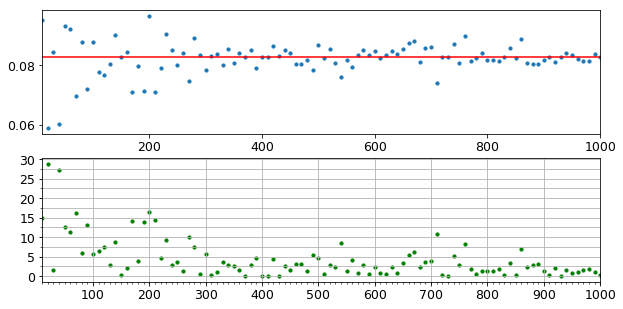

In [41]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
ax.plot(sample_size_range, a_pop_var, color='r');
ax.scatter(sample_size_range, a_est_var, s=10);
ax.tick_params(labelsize=12.5)
ax.set_xlim([10, 1000])
#
ax2 = fig.add_subplot(2,1,2)
ax2.scatter(sample_size_range, np.multiply(a_diff,100), s=10, color='g');
# labels
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(2.5))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))
#
ax2.tick_params(labelsize=12.5)
ax2.set_xlim([10, 1000])
ax2.grid(which='minor', axis='y')
ax2.grid(which='major', axis='x')